# Principal Component Analysis
The goal of this question is to build a conceptual understanding of dimensionality reduction using PCA and implement it on a toy dataset. You’ll only have to use numpy and matplotlib for this question.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# (a) Load data (features)
X = 0
def load_data(X):
    X = 'features.npy'
    data = np.load(X)
    
    mu = np.mean(data,axis=0)
    sigma = np.std(data,axis=0)
    data-=mu
    data/=sigma
    return data

test = load_data(X)
print(test.shape)
print('Mean: {}\nSTD: {}'.format(np.mean(test), np.std(test)))

(150, 8)
Mean: -6.158037043254202e-16
STD: 1.0


In [3]:
# (b) Perform eigen decomposition and return eigen pairs in desecending order of eigen values
def eigendecomp(X):
    covariance = np.cov(X.T)
#     print(covariance)
#     print(covariance.shape)
    sorted_eig_vals,sorted_eig_vecs = np.linalg.eig(covariance)
#     print(w,v)
    return (sorted_eig_vals, sorted_eig_vecs)
eigendecomp(test)

(array([ 4.74298961e+00,  2.29585309e+00,  7.76910512e-01,  2.04172901e-01,
         3.37651661e-02, -7.03281987e-16,  6.34199026e-18,  8.43406727e-16]),
 array([[-0.39124937,  0.13884872, -0.46160937,  0.58034539,  0.24934936,
          0.20978664, -0.42116938,  0.09320476],
        [ 0.11687696, -0.4391715 , -0.78711289, -0.2905579 , -0.12725786,
          0.07280114,  0.20605814,  0.14672413],
        [-0.40655289,  0.29080021, -0.13961871, -0.12636707, -0.54994554,
         -0.59631459, -0.06875535,  0.21509872],
        [-0.39944906,  0.26454833, -0.16206048, -0.54404218,  0.49904279,
         -0.06355642,  0.05521708, -0.43718158],
        [-0.3778555 , -0.35426671,  0.07790627,  0.42060984,  0.12822569,
         -0.32964346,  0.66179491, -0.14645517],
        [-0.09816172, -0.64299795,  0.11941452, -0.04972667, -0.0795516 ,
         -0.20011335, -0.56640575, -0.40331041],
        [-0.45509399, -0.03231459,  0.12200908, -0.08034689, -0.51935676,
          0.65722825,  0.07577872,

In [4]:
# (c) Evaluate using variance_explained as the metric
#ratio between sum of k eigenvalues and sum of all eigenvalues
def eval(X):
    eigenval,eigenvec = eigendecomp(X)
    
    for k in range(1,9):
        var_expl = np.sum(eigenval[0:k])
        var_tot = np.sum(eigenval)
        ratio = var_expl/var_tot
        print('Ratio:',ratio)
    print('Eigenvalue',eigenval)
eval(test)

Ratio: 0.5889212098295772
Ratio: 0.8739896347022311
Ratio: 0.9704560233211404
Ratio: 0.9958074918820439
Ratio: 1.0
Ratio: 1.0
Ratio: 1.0
Ratio: 1.0
Eigenvalue [ 4.74298961e+00  2.29585309e+00  7.76910512e-01  2.04172901e-01
  3.37651661e-02 -7.03281987e-16  6.34199026e-18  8.43406727e-16]


In [5]:
def project(X):
    eigenval,eigenvec = eigendecomp(X)
#     print(eigenvec)
    eigenvector = np.column_stack((eigenvec[:,0],eigenvec[:,1]))
    print('eigenvector',eigenvector)
#     print(arr.shape)
#     print(X.shape)
    reduced_data = (np.matmul(X,eigenvector))
    return reduced_data
print('reduced_data',project(test))

eigenvector [[-0.39124937  0.13884872]
 [ 0.11687696 -0.4391715 ]
 [-0.40655289  0.29080021]
 [-0.39944906  0.26454833]
 [-0.3778555  -0.35426671]
 [-0.09816172 -0.64299795]
 [-0.45509399 -0.03231459]
 [-0.38587285 -0.30545597]]
reduced_data [[ 1.14283537 -2.75916236]
 [ 4.47917874  1.87206668]
 [ 2.36294554 -1.18487643]
 [ 2.11785321 -1.23400373]
 [ 2.35720963 -1.59610139]
 [ 2.11794046 -1.66871235]
 [ 2.59256157 -1.1733813 ]
 [ 1.69738736 -1.94274515]
 [ 3.84415322  0.91236648]
 [ 2.54114976 -0.61023934]
 [ 0.53307793 -3.52114295]
 [ 2.1342099  -1.52068107]
 [ 2.20338749 -0.9757627 ]
 [ 3.35078423 -0.23733063]
 [ 2.15681408 -2.04798058]
 [ 2.26610464 -2.28577345]
 [ 1.14461493 -3.08406768]
 [ 2.49984619 -1.06451121]
 [ 2.18818227 -1.28000327]
 [ 2.83611365 -1.13516124]
 [ 2.7612342  -0.24427366]
 [ 3.15987429 -0.47080825]
 [ 1.58717236 -3.08977007]
 [ 0.66469116 -2.43034637]
 [ 2.7406176  -0.60365427]
 [ 3.18585395  0.57768826]
 [ 0.81361677 -2.69041059]
 [ 2.8319995  -0.635948  ]
 [

eigenvector [[-0.39124937  0.13884872]
 [ 0.11687696 -0.4391715 ]
 [-0.40655289  0.29080021]
 [-0.39944906  0.26454833]
 [-0.3778555  -0.35426671]
 [-0.09816172 -0.64299795]
 [-0.45509399 -0.03231459]
 [-0.38587285 -0.30545597]]


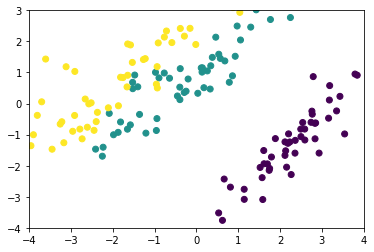

In [6]:
Y = 'labels.npy'
labels = np.load(Y,allow_pickle=True)
# (d) Visualize after projecting to 2-D space
def viz(X):
    plt.ylim(-4,3)
    plt.xlim(-4,4)
    data_reduced = project(X)
    plt.scatter(data_reduced[:,0],data_reduced[:,1],c=labels)
viz(test)

In [7]:
# def main():
#     eval()
#     viz()

# if __name__ == "__main__":
#     main()

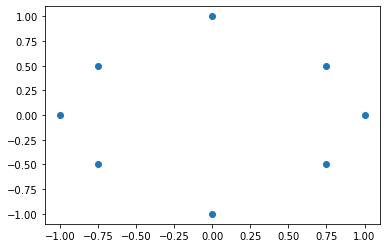

In [8]:
x_dat = np.array([-1,1,0,0,0.75,-0.75, 0.75,-0.75])
y_dat = np.array([0,0,1,-1,0.5,0.5,-0.5,-0.5])

plt.scatter(x_dat,y_dat)

PCA does not work well for non-linear data